In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

np.random.seed(42)
def load_csv(path):
    full = os.path.join('diabetes', path)
    return pd.read_csv(full)

In [4]:
full = load_csv('diabetic_data_original.csv')
pd.set_option('display.max_columns', None)

In [5]:
full.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,717,749,790,NaN,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
full.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [11]:
def get_cols_with_empty(df):
    print("\nA log of missing values for columns:")
    questions = (df == '?')
    
    ret = []

    for col in questions.columns:
        counts = questions[col].value_counts()

        if True in counts.keys().values:
            ret.append(col)
            print(col, 'has', counts[True], 'question marks (', int(counts[True] / questions[col].shape[0] * 100), '%)')
    
    print("\n")
    return ret

get_cols_with_empty(full)


A log of missing values for columns:
race has 2273 question marks ( 2 %)
weight has 98569 question marks ( 96 %)
payer_code has 40256 question marks ( 39 %)
medical_specialty has 49949 question marks ( 49 %)
diag_1 has 21 question marks ( 0 %)
diag_2 has 358 question marks ( 0 %)
diag_3 has 1423 question marks ( 1 %)




/home/simeon/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

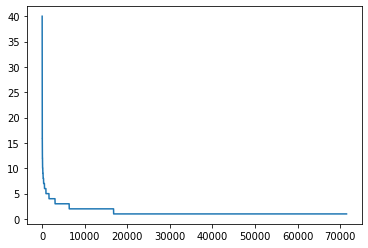

Singular count is 54745


In [9]:
def get_singular_info(df):
    patients = df['patient_nbr'].value_counts().values
    plt.plot(np.arange(len(patients)), patients)
    plt.show()

    singular_count = np.sum(patients == 1)
    print("Singular count is", singular_count)
    
get_singular_info(full)

In [66]:
def add_presence_cols(df, cols):
    for col in cols:
        df[col+'_present'] = (df[col] != '?').astype(int)
        
    print("Added presence indicator for columns", cols)

def parse_interval_val(intv):
    if intv == '?':
        return intv
    
    return np.mean(list(map(int, intv[1:-1].split('-'))))

def fix_interval_col(df, colname):
    df[colname] = df[colname].apply(parse_interval_val)
    print("Converted string intervals to numerical values in column", colname)
    return df

def fill_with_means(df, colname):
    non_null = df[colname] != '?'
    mean = np.mean(df[colname][non_null].astype(np.float))
    
    cnt_replaced = np.sum(df[colname] == '?')
    
    df[colname] = df[colname].replace('?', mean)
    print(f"Filled {cnt_replaced} missing values in column {colname} with mean = {mean}")
    
def group_by_patients(df):
    grouped = df.groupby('patient_nbr', axis=0)
    groups = list(grouped.groups.keys())

    for group in groups:
        yield grouped.get_group(group).sort_values('encounter_id')

def remove_1_visit_notinplace(df):
    val_counts = df['patient_nbr'].value_counts()
    patient, visits = val_counts.index, val_counts.values
    multiple_idx = (visits != 1)

    keep_patients = patient[multiple_idx]
    
    index = df['patient_nbr'].map(lambda x: x in keep_patients)
    print("Removed", len(df)-np.sum(index), " records of patients with 1 visit")
    return df[index]
        
def prepare_for_training(df):
    to_append = []

    for group_df in group_by_patients(remove_1_visit_notinplace(df)):
        
#         if (len(group_df) < 6):
#             continue
        
        new_ds = group_df.iloc[:-1].copy() # I will need all but the last row of features
        ordered_vals = group_df['time_in_hospital'].values
                
#         new_ds['current_stay_length_removeme'] = group_df['time_in_hospital']

        new_ds['next_time_in_hospital'] = ordered_vals[1:] # I will need all but the first label
        
        cnt_visits = np.arange(ordered_vals.shape[0] - 1) + 1
        new_ds['which_visit_is_this'] = cnt_visits
        
        cumsum = np.concatenate(([0], np.cumsum(ordered_vals[:-2])))
        new_ds['total_stay_without_this'] = cumsum
        new_ds['mean_stay_without_this'] = np.concatenate(([0], cumsum[1:] / cnt_visits[:-1]))
#         return new_ds
        
        to_append.append(new_ds)

    print("Added columns 'next_time_in_hospital', 'which_visit_is_this', 'total_stay_without_this' and 'mean_stay_without_this'; then removed old 'time_in_hospital'")
    return pd.concat(to_append, ignore_index=True).drop('time_in_hospital', axis=1)

from sklearn.preprocessing import StandardScaler

def scale_column(df, colname):
    scaler = StandardScaler()
    df[colname] = scaler.fit_transform(df[colname].values.reshape(-1, 1))[:, 0]
    
    print("Standard-scaled column", colname, ": mean was", scaler.mean_, "and variance was", scaler.var_)

def scale_columns(df, cols):
    for col in cols:
        scale_column(df, col)
        
def bin_columns(df, cols):
    print("One-hot encoded columns", cols)
    return pd.get_dummies(df, columns=cols, drop_first=True)

def get_cat_cols(df):
    return df.select_dtypes(include='object').columns.values

def diag_type(seq):
    
    seq = str(seq)
    
    if seq[0] == 'E':
        return 'injury and poisoning'
    if seq[0] == 'V':
        return 'Supplementary Classification of Factors influencing Health Status and Contact with Health Services'
    if seq[0] == 'M':
        return 'Morphology of Neoplasms'
    
    if seq == '?':
        return '?'
    
    num = float(seq)
    
    if num <= 139:
        return 'Infectious and Parasitic Diseases'
    elif num <= 239:
        return 'Neoplasms'
    elif num <= 279:
        return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
    elif num <= 289:
        return 'Diseases of the Blood and Blood-forming Organs'
    elif num <= 319:
        return 'Mental Disorders'
    elif num <= 389:
        return 'Diseases of the Nervous System and Sense Organs'
    elif num <= 459:
        return 'Diseases of the Circulatory System'
    elif num <= 519:
        return 'Diseases of the Respiratory System'
    elif num <= 579:
        return 'Diseases of the Digestive System'
    elif num <= 629:
        return 'Diseases of the Genitourinary System'
    elif num <= 679:
        return 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif num <= 709:
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif num <= 739:
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif num <= 759:
        return 'Congenital Anomalies'
    elif num <= 779:
        return 'Certain Conditions originating in the Perinatal Period'
    elif num <= 799:
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif num <= 999:
        return 'Injury and Poisoning'
    else:
        return 'DON\'T KNOW'

def clever_compress_diags_inplace(df):
    diags = ['diag_1', 'diag_2', 'diag_3']
    
    for diag in diags:
        df[diag] = np.vectorize(diag_type)(df[diag])
        
def drop_columns(df, columns):
    print("Dropped columns:", columns)
    return df.drop(columns, axis=1, inplace=True)

In [61]:
df = full.copy()

In [68]:
df = prepare_for_training(df)

Removed 54745  records of patients with 1 visit
Added columns 'next_time_in_hospital', 'which_visit_is_this', 'total_stay_without_this' and 'mean_stay_without_this'; then removed old 'time_in_hospital'


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe37966e6d0>,
      dtype=object)

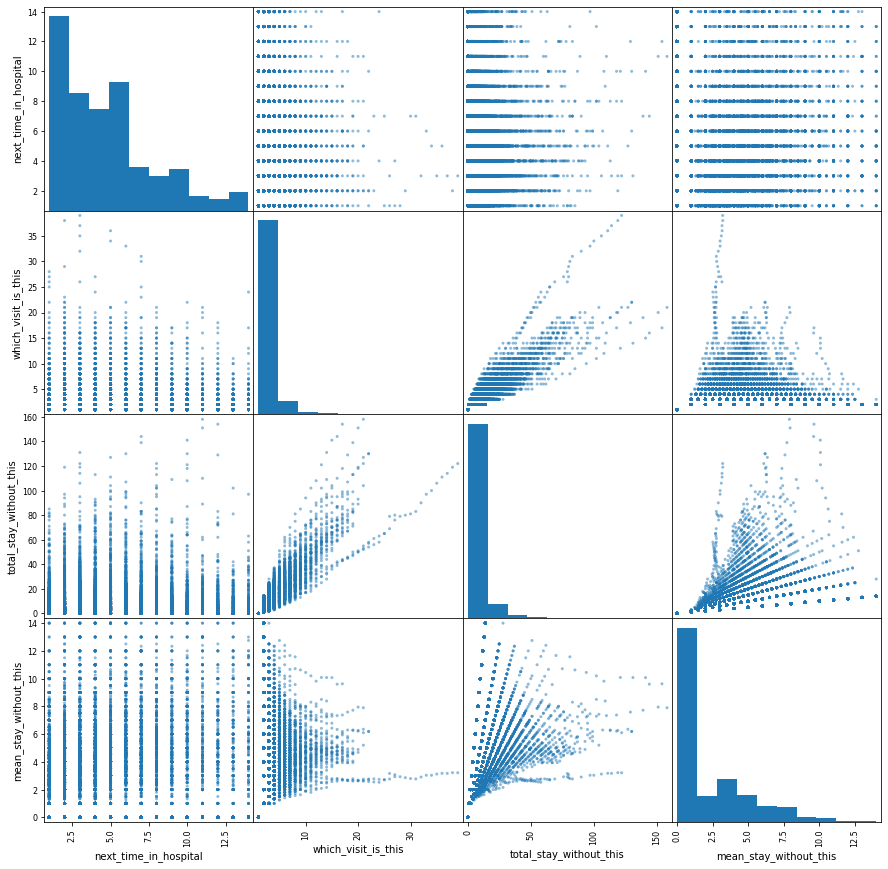

In [75]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    df[['next_time_in_hospital', 'which_visit_is_this', 'total_stay_without_this', 'mean_stay_without_this']],
    figsize=(15, 15))

Removed 54745  records of patients with 1 visit


(array([11944.,  2708.,   120.,   557.,   272.,    16.,   619.,   336.,
          170.,    31.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <a list of 10 Patch objects>)

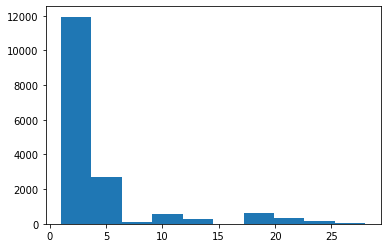

In [14]:
df = full.copy()

to_append = []

for group_df in group_by_patients(remove_1_visit_notinplace(df)):
    to_append.append(group_df['discharge_disposition_id'].values[-1])

In [15]:
pd.Series(to_append).value_counts()

1     8702
3     2938
6     2392
18     617
11     557
22     335
2      304
4      160
5      156
14     140
13     131
7       98
25      83
23      79
28      30
8       18
24       8
15       7
17       6
9        4
16       3
19       2
20       1
27       1
12       1
dtype: int64

In [8]:
play = full.copy()

def get_unique_pairs(df):
    pairs = []
    
    for col in df.columns:
        pairs.append((col, df[col].unique().shape[0]))
    
    # Sort them by occurrence
    ret = np.array(pairs)
    sort_idx = np.argsort(ret[:, 1].astype(int))
    ret = ret[sort_idx]
    
    return ret

def get_singular_cols(df):
    singular_cols = []
    unq_pairs = get_unique_pairs(df)
    
    for col, unq in unq_pairs:
        if int(unq) == 1:
            singular_cols.append(col)
    
    print("Singular columns:", singular_cols)
    return singular_cols

get_singular_cols(play)

Singular columns: ['examide', 'citoglipton']


['examide', 'citoglipton']

In [9]:
full_categorical = full.copy()
current_dataset = full_categorical

# Get a next_stay_in_hospital column
current_dataset = prepare_for_training(current_dataset)

# Drop columns of no importance to prediction
drop_columns(current_dataset, ['encounter_id', 'patient_nbr'])

# Drop columns with only 1 value
drop_columns(current_dataset, get_singular_cols(current_dataset))

# Presence columns
add_presence_cols(current_dataset, ['weight', 'payer_code'])

# Fix intervals
fix_interval_col(current_dataset, 'weight')
fix_interval_col(current_dataset, 'age')

# Fill non-present values with the mean
fill_with_means(current_dataset, 'weight')

# print cols with empty for debugging
get_cols_with_empty(current_dataset)

current_dataset = bin_columns(current_dataset, ['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
current_dataset = bin_columns(current_dataset, get_cat_cols(current_dataset))

scale_columns(current_dataset, current_dataset.columns)

full_categorical = current_dataset
full_categorical

Removed 54745  records of patients with 1 visit
Added a 'next_time_in_hospital' column and removed 'time_in_hospital'
Dropped columns: ['encounter_id', 'patient_nbr']
Singular columns: ['acetohexamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'examide']
Dropped columns: ['acetohexamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'examide']
Added presence indicator for columns ['weight', 'payer_code']
Converted string intervals to numerical values in column weight
Converted string intervals to numerical values in column age
Filled 29898 missing values in column weight with mean = 83.73571428571428
race has 395 question marks ( 1 %)
payer_code has 10171 question marks ( 33 %)
medical_specialty has 15424 question marks ( 50 %)
diag_1 has 4 question marks ( 0 %)
diag_2 has 68 question marks ( 0 %)
diag_3 has 277 question marks ( 0 %)
One-hot encoded columns ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
One-hot

/home/simeon/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Standard-scaled column age : mean was [66.19974874] and variance was [249.60860613]
Standard-scaled column weight : mean was [83.73571429] and variance was [8.29300461]
Standard-scaled column num_lab_procedures : mean was [42.47480825] and variance was [370.93146006]
Standard-scaled column num_procedures : mean was [1.1974676] and variance was [2.62217423]
Standard-scaled column num_medications : mean was [16.38709997] and variance was [59.79947257]
Standard-scaled column number_outpatient : mean was [0.47170061] and variance was [2.10664426]
Standard-scaled column number_emergency : mean was [0.33479899] and variance was [1.79828387]
Standard-scaled column number_inpatient : mean was [1.0363991] and variance was [2.80524083]
Standard-scaled column number_diagnoses : mean was [7.63458741] and variance was [3.29708062]
Standard-scaled column next_time_in_hospital : mean was [4.64863793] and variance was [9.32371475]
Standard-scaled column weight_present : mean was [0.01157101] and varia

Standard-scaled column medical_specialty_PhysicianNotFound : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column medical_specialty_Podiatry : mean was [0.00138852] and variance was [0.00138659]
Standard-scaled column medical_specialty_Psychiatry : mean was [0.00800053] and variance was [0.00793652]
Standard-scaled column medical_specialty_Psychiatry-Child/Adolescent : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column medical_specialty_Psychology : mean was [0.00119016] and variance was [0.00118874]
Standard-scaled column medical_specialty_Pulmonology : mean was [0.00737239] and variance was [0.00731804]
Standard-scaled column medical_specialty_Radiologist : mean was [0.01061227] and variance was [0.01049965]
Standard-scaled column medical_specialty_Radiology : mean was [0.0006612] and variance was [0.00066076]
Standard-scaled column medical_specialty_Resident : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Sta

Standard-scaled column diag_1_245 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_1_250 : mean was [0.00102486] and variance was [0.00102381]
Standard-scaled column diag_1_250.01 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_1_250.02 : mean was [0.00614917] and variance was [0.00611135]
Standard-scaled column diag_1_250.03 : mean was [0.00122322] and variance was [0.00122173]
Standard-scaled column diag_1_250.1 : mean was [0.00350436] and variance was [0.00349208]
Standard-scaled column diag_1_250.11 : mean was [0.00783523] and variance was [0.00777384]
Standard-scaled column diag_1_250.12 : mean was [0.00393414] and variance was [0.00391867]
Standard-scaled column diag_1_250.13 : mean was [0.01028167] and variance was [0.01017596]
Standard-scaled column diag_1_250.2 : mean was [0.00062814] and variance was [0.00062775]
Standard-scaled column diag_1_250.21 : mean was [0.0001653] and variance was [0.00016527]
S

Standard-scaled column diag_1_382 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_1_383 : mean was [0.0001653] and variance was [0.00016527]
Standard-scaled column diag_1_386 : mean was [0.0011571] and variance was [0.00115576]
Standard-scaled column diag_1_39 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_1_395 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_1_396 : mean was [0.0001653] and variance was [0.00016527]
Standard-scaled column diag_1_397 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_1_398 : mean was [0.00158688] and variance was [0.00158436]
Standard-scaled column diag_1_401 : mean was [0.0036366] and variance was [0.00362338]
Standard-scaled column diag_1_402 : mean was [0.00443004] and variance was [0.00441042]
Standard-scaled column diag_1_403 : mean was [0.00714097] and variance was [0.00708997]
Standar

Standard-scaled column diag_1_532 : mean was [0.0018183] and variance was [0.001815]
Standard-scaled column diag_1_533 : mean was [0.0003306] and variance was [0.00033049]
Standard-scaled column diag_1_534 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_1_535 : mean was [0.00459535] and variance was [0.00457423]
Standard-scaled column diag_1_536 : mean was [0.00171912] and variance was [0.00171617]
Standard-scaled column diag_1_537 : mean was [0.00119016] and variance was [0.00118874]
Standard-scaled column diag_1_54 : mean was [0.00013224] and variance was [0.00013222]
Standard-scaled column diag_1_540 : mean was [0.00092568] and variance was [0.00092482]
Standard-scaled column diag_1_541 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_1_543 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_1_550 : mean was [0.00036366] and variance was [0.00036353]
Standard-scaled column 

Standard-scaled column diag_1_753 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_1_756 : mean was [0.00013224] and variance was [0.00013222]
Standard-scaled column diag_1_78 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_1_780 : mean was [0.02006744] and variance was [0.01966474]
Standard-scaled column diag_1_781 : mean was [0.00085956] and variance was [0.00085882]
Standard-scaled column diag_1_782 : mean was [0.00059508] and variance was [0.00059473]
Standard-scaled column diag_1_783 : mean was [0.00026448] and variance was [0.00026441]
Standard-scaled column diag_1_784 : mean was [0.00152076] and variance was [0.00151845]
Standard-scaled column diag_1_785 : mean was [0.00059508] and variance was [0.00059473]
Standard-scaled column diag_1_786 : mean was [0.03577096] and variance was [0.0344914]
Standard-scaled column diag_1_787 : mean was [0.00333906] and variance was [0.00332791]
Standard-scaled col

Standard-scaled column diag_2_112 : mean was [0.00191748] and variance was [0.00191381]
Standard-scaled column diag_2_114 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_2_115 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_2_135 : mean was [0.0013224] and variance was [0.00132065]
Standard-scaled column diag_2_138 : mean was [0.0001653] and variance was [0.00016527]
Standard-scaled column diag_2_141 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_2_150 : mean was [0.00056202] and variance was [0.0005617]
Standard-scaled column diag_2_151 : mean was [0.00013224] and variance was [0.00013222]
Standard-scaled column diag_2_152 : mean was [0.00029754] and variance was [0.00029745]
Standard-scaled column diag_2_153 : mean was [0.00125628] and variance was [0.0012547]
Standard-scaled column diag_2_154 : mean was [0.00046284] and variance was [0.00046263]
Standard-scale

Standard-scaled column diag_2_276 : mean was [0.07375694] and variance was [0.06831686]
Standard-scaled column diag_2_277 : mean was [0.0008265] and variance was [0.00082582]
Standard-scaled column diag_2_278 : mean was [0.00191748] and variance was [0.00191381]
Standard-scaled column diag_2_279 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_2_280 : mean was [0.00588469] and variance was [0.00585006]
Standard-scaled column diag_2_281 : mean was [0.0001653] and variance was [0.00016527]
Standard-scaled column diag_2_282 : mean was [0.00062814] and variance was [0.00062775]
Standard-scaled column diag_2_283 : mean was [0.00023142] and variance was [0.00023137]
Standard-scaled column diag_2_284 : mean was [0.00168606] and variance was [0.00168322]
Standard-scaled column diag_2_285 : mean was [0.01315789] and variance was [0.01298476]
Standard-scaled column diag_2_286 : mean was [0.00128934] and variance was [0.00128768]
Standard-scaled column dia

Standard-scaled column diag_2_413 : mean was [0.00925681] and variance was [0.00917112]
Standard-scaled column diag_2_414 : mean was [0.02152208] and variance was [0.02105888]
Standard-scaled column diag_2_415 : mean was [0.00089262] and variance was [0.00089182]
Standard-scaled column diag_2_416 : mean was [0.00105792] and variance was [0.0010568]
Standard-scaled column diag_2_42 : mean was [0.00092568] and variance was [0.00092482]
Standard-scaled column diag_2_420 : mean was [0.0001653] and variance was [0.00016527]
Standard-scaled column diag_2_421 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_2_423 : mean was [0.00023142] and variance was [0.00023137]
Standard-scaled column diag_2_424 : mean was [0.00955435] and variance was [0.00946307]
Standard-scaled column diag_2_425 : mean was [0.01692674] and variance was [0.01664022]
Standard-scaled column diag_2_426 : mean was [0.00238032] and variance was [0.00237466]
Standard-scaled column diag_2_427 :

Standard-scaled column diag_2_564 : mean was [0.00076038] and variance was [0.0007598]
Standard-scaled column diag_2_565 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_2_566 : mean was [0.00013224] and variance was [0.00013222]
Standard-scaled column diag_2_567 : mean was [0.00105792] and variance was [0.0010568]
Standard-scaled column diag_2_568 : mean was [0.00052896] and variance was [0.00052868]
Standard-scaled column diag_2_569 : mean was [0.00168606] and variance was [0.00168322]
Standard-scaled column diag_2_570 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_2_571 : mean was [0.00568633] and variance was [0.00565399]
Standard-scaled column diag_2_572 : mean was [0.00095874] and variance was [0.00095782]
Standard-scaled column diag_2_573 : mean was [0.00052896] and variance was [0.00052868]
Standard-scaled column diag_2_574 : mean was [0.0021489] and variance was [0.00214428]
Standard-scaled column diag_2_575 :

Standard-scaled column diag_2_8 : mean was [0.00241338] and variance was [0.00240756]
Standard-scaled column diag_2_802 : mean was [0.00013224] and variance was [0.00013222]
Standard-scaled column diag_2_805 : mean was [0.00079344] and variance was [0.00079281]
Standard-scaled column diag_2_807 : mean was [0.00023142] and variance was [0.00023137]
Standard-scaled column diag_2_808 : mean was [0.00042978] and variance was [0.0004296]
Standard-scaled column diag_2_812 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_2_813 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_2_814 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_2_815 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_2_816 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_2_820 : mean was [0.0006612] and variance was [0.00066076]
Standar

Standard-scaled column diag_3_151 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_152 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_153 : mean was [0.00046284] and variance was [0.00046263]
Standard-scaled column diag_3_154 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_3_155 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_3_156 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_3_157 : mean was [0.00036366] and variance was [0.00036353]
Standard-scaled column diag_3_162 : mean was [0.001653] and variance was [0.00165027]
Standard-scaled column diag_3_163 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_164 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_171 : mean was [3.3060037e-05] and varia

Standard-scaled column diag_3_282 : mean was [0.0004959] and variance was [0.00049565]
Standard-scaled column diag_3_283 : mean was [0.00013224] and variance was [0.00013222]
Standard-scaled column diag_3_284 : mean was [0.00185136] and variance was [0.00184793]
Standard-scaled column diag_3_285 : mean was [0.01107511] and variance was [0.01095245]
Standard-scaled column diag_3_286 : mean was [0.0013224] and variance was [0.00132065]
Standard-scaled column diag_3_287 : mean was [0.00333906] and variance was [0.00332791]
Standard-scaled column diag_3_288 : mean was [0.00112404] and variance was [0.00112278]
Standard-scaled column diag_3_289 : mean was [0.0003306] and variance was [0.00033049]
Standard-scaled column diag_3_290 : mean was [0.00079344] and variance was [0.00079281]
Standard-scaled column diag_3_291 : mean was [0.00036366] and variance was [0.00036353]
Standard-scaled column diag_3_292 : mean was [0.00052896] and variance was [0.00052868]
Standard-scaled column diag_3_293 :

Standard-scaled column diag_3_441 : mean was [0.00046284] and variance was [0.00046263]
Standard-scaled column diag_3_442 : mean was [0.00026448] and variance was [0.00026441]
Standard-scaled column diag_3_443 : mean was [0.00238032] and variance was [0.00237466]
Standard-scaled column diag_3_444 : mean was [0.00046284] and variance was [0.00046263]
Standard-scaled column diag_3_445 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_446 : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column diag_3_447 : mean was [0.00039672] and variance was [0.00039656]
Standard-scaled column diag_3_451 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_3_452 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_3_453 : mean was [0.00244644] and variance was [0.00244046]
Standard-scaled column diag_3_454 : mean was [0.00023142] and variance was [0.00023137]
Standard-

Standard-scaled column diag_3_586 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_3_588 : mean was [0.0001653] and variance was [0.00016527]
Standard-scaled column diag_3_590 : mean was [0.00039672] and variance was [0.00039656]
Standard-scaled column diag_3_591 : mean was [0.00145464] and variance was [0.00145253]
Standard-scaled column diag_3_592 : mean was [0.00062814] and variance was [0.00062775]
Standard-scaled column diag_3_593 : mean was [0.0038019] and variance was [0.00378745]
Standard-scaled column diag_3_594 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Standard-scaled column diag_3_595 : mean was [0.00046284] and variance was [0.00046263]
Standard-scaled column diag_3_596 : mean was [0.00095874] and variance was [0.00095782]
Standard-scaled column diag_3_597 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_598 : mean was [9.91801111e-05] and variance was [9.91702744e-05]
Sta

Standard-scaled column diag_3_837 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_838 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_840 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_3_844 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_845 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_848 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_854 : mean was [6.61200741e-05] and variance was [6.61157022e-05]
Standard-scaled column diag_3_860 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_861 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_863 : mean was [3.3060037e-05] and variance was [3.30589441e-05]
Standard-scaled column diag_3_865 : mean was [3.

Standard-scaled column A1Cresult_Norm : mean was [0.04092833] and variance was [0.0392532]
Standard-scaled column metformin_No : mean was [0.82101296] and variance was [0.14695068]
Standard-scaled column metformin_Steady : mean was [0.16526713] and variance was [0.1379539]
Standard-scaled column metformin_Up : mean was [0.00889315] and variance was [0.00881406]
Standard-scaled column repaglinide_No : mean was [0.98118884] and variance was [0.0184573]
Standard-scaled column repaglinide_Steady : mean was [0.01742264] and variance was [0.01711909]
Standard-scaled column repaglinide_Up : mean was [0.00105792] and variance was [0.0010568]
Standard-scaled column nateglinide_No : mean was [0.99282597] and variance was [0.00712256]
Standard-scaled column nateglinide_Steady : mean was [0.00690955] and variance was [0.00686181]
Standard-scaled column nateglinide_Up : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column chlorpropamide_Steady : mean was [0.00059508] and varia

age        weight  num_lab_procedures  num_procedures  \
0     -0.708889 -4.934740e-15            1.792624        2.965784   
1     -0.708889 -4.934740e-15            0.027269        0.495601   
2     -0.708889 -4.934740e-15            0.131114        1.730692   
3     -0.075938 -4.934740e-15            0.598413        0.495601   
4     -0.075938 -4.934740e-15           -0.647720       -0.121945   
...         ...           ...                 ...             ...   
30243  1.189964 -4.934740e-15            1.169558       -0.739491   
30244  1.189964 -4.934740e-15            0.961869        0.495601   
30245  0.557013 -4.934740e-15            0.494569       -0.739491   
30246  0.557013 -4.934740e-15            0.858024       -0.121945   
30247 -0.075938 -4.934740e-15            0.598413       -0.121945   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
0             2.148309          -0.324991         -0.249663         -0.618788   
1            -0.438005          -0.324991         -0.249663         -0.021732   
2            -0.179374          -0.324991         -0.249663          0.575324   
3             0.337889          -0.324991         -0.249663         -0.021732   
4            -0.050058          -0.324991         -0.249663         -0.021732   
...                ...                ...               ...               ...   
30243         0.208573          -0.324991         -0.249663         -0.021732   
30244        -0.955268          -0.324991         -0.249663         -0.618788   
30245        -0.696637          -0.324991         -0.249663         -0.618788   
30246         1.113783          -0.324991         -0.249663         -0.021732   
30247         0.079258          -0.324991         -0.249663         -0.021732   

       number_diagnoses  next_time_in_hospital  weight_present  \
0              0.201242              -0.539922       -0.108196   
1             -3.103111               0.442565       -0.108196   
2             -0.900209               1.752548       -0.108196   
3              0.751968               1.097556       -0.108196   
4             -3.103111               2.407539       -0.108196   
...                 ...                    ...             ...   
30243          0.751968              -0.539922       -0.108196   
30244         -1.450935              -0.867417       -0.108196   
30245          0.751968              -0.867417       -0.108196   
30246          0.751968               0.442565       -0.108196   
30247          0.751968              -0.867417       -0.108196   

       payer_code_present  admission_type_id_2  admission_type_id_3  \
0               -1.404972             2.133572            -0.447462   
1               -1.404972            -0.468698            -0.447462   
2               -1.404972            -0.468698            -0.447462   
3               -1.404972            -0.468698            -0.447462   
4               -1.404972            -0.468698            -0.447462   
...                   ...                  ...                  ...   
30243            0.711758            -0.468698            -0.447462   
30244            0.711758            -0.468698            -0.447462   
30245            0.711758            -0.468698             2.234827   
30246            0.711758            -0.468698            -0.447462   
30247            0.711758            -0.468698            -0.447462   

       admission_type_id_4  admission_type_id_5  admission_type_id_6  \
0                 -0.00575            -0.260775            -0.185765   
1                 -0.00575            -0.260775            -0.185765   
2                 -0.00575            -0.260775            -0.185765   
3                 -0.00575            -0.260775            -0.185765   
4                 -0.00575            -0.260775            -0.185765   
...                    ...                  ...                  ...   
30243             -0.00575            -0.260775            -

In [17]:
diags_compressed = full.copy()
current_dataset = diags_compressed

# Get a next_stay_in_hospital column
current_dataset = prepare_for_training(current_dataset)

# Drop columns of no importance to prediction
drop_columns(current_dataset, ['encounter_id', 'patient_nbr'])

# Drop columns with only 1 value
drop_columns(current_dataset, get_singular_cols(current_dataset))

# Presence columns
add_presence_cols(current_dataset, ['weight'])

# Fix intervals
fix_interval_col(current_dataset, 'weight')
fix_interval_col(current_dataset, 'age')

# Fill non-present values with the mean
fill_with_means(current_dataset, 'weight')

# Handle categorical data
clever_compress_diags_inplace(current_dataset)


# print cols with empty for debugging
get_cols_with_empty(current_dataset)

current_dataset = bin_columns(current_dataset, 
                              ['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
current_dataset = bin_columns(current_dataset, get_cat_cols(current_dataset))

scale_columns(current_dataset, current_dataset.columns)

diags_compressed = current_dataset

Removed 54745  records of patients with 1 visit
Added a 'next_time_in_hospital' column and removed 'time_in_hospital'
Dropped columns: ['encounter_id', 'patient_nbr']
Singular columns: ['acetohexamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'examide']
Dropped columns: ['acetohexamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'examide']
Added presence indicator for columns ['weight']
Converted string intervals to numerical values in column weight
Converted string intervals to numerical values in column age
Filled 29898 missing values in column weight with mean = 83.73571428571428

A log of missing values for columns:
race has 395 question marks ( 1 %)
payer_code has 10171 question marks ( 33 %)
medical_specialty has 15424 question marks ( 50 %)
diag_1 has 4 question marks ( 0 %)
diag_2 has 68 question marks ( 0 %)
diag_3 has 277 question marks ( 0 %)


One-hot encoded columns ['admission_type_id', 'discharge_disposition_id', 'adm

/home/simeon/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


One-hot encoded columns ['race' 'gender' 'payer_code' 'medical_specialty' 'diag_1' 'diag_2'
 'diag_3' 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide'
 'nateglinide' 'chlorpropamide' 'glimepiride' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'insulin' 'glyburide-metformin'
 'glipizide-metformin' 'glimepiride-pioglitazone' 'change' 'diabetesMed'
 'readmitted']
Standard-scaled column age : mean was [66.19974874] and variance was [249.60860613]
Standard-scaled column weight : mean was [83.73571429] and variance was [8.29300461]
Standard-scaled column num_lab_procedures : mean was [42.47480825] and variance was [370.93146006]
Standard-scaled column num_procedures : mean was [1.1974676] and variance was [2.62217423]
Standard-scaled column num_medications : mean was [16.38709997] and variance was [59.79947257]
Standard-scaled column number_outpatient : mean was [0.47170061] and variance was [2.10664426]
Standard

Standard-scaled column metformin_No : mean was [0.82101296] and variance was [0.14695068]
Standard-scaled column metformin_Steady : mean was [0.16526713] and variance was [0.1379539]
Standard-scaled column metformin_Up : mean was [0.00889315] and variance was [0.00881406]
Standard-scaled column repaglinide_No : mean was [0.98118884] and variance was [0.0184573]
Standard-scaled column repaglinide_Steady : mean was [0.01742264] and variance was [0.01711909]
Standard-scaled column repaglinide_Up : mean was [0.00105792] and variance was [0.0010568]
Standard-scaled column nateglinide_No : mean was [0.99282597] and variance was [0.00712256]
Standard-scaled column nateglinide_Steady : mean was [0.00690955] and variance was [0.00686181]
Standard-scaled column nateglinide_Up : mean was [0.00019836] and variance was [0.00019832]
Standard-scaled column chlorpropamide_Steady : mean was [0.00059508] and variance was [0.00059473]
Standard-scaled column chlorpropamide_Up : mean was [6.61200741e-05] a

In [16]:
diags_unscaled = full.copy()
current_dataset = diags_unscaled

# Get a next_stay_in_hospital column
current_dataset = prepare_for_training(current_dataset)

# Drop columns of no importance to prediction
drop_columns(current_dataset, ['encounter_id', 'patient_nbr'])

# Drop columns with only 1 value
drop_columns(current_dataset, get_singular_cols(current_dataset))

# Presence columns
add_presence_cols(current_dataset, ['weight'])

# Fix intervals
fix_interval_col(current_dataset, 'weight')
fix_interval_col(current_dataset, 'age')

# Fill non-present values with the mean
fill_with_means(current_dataset, 'weight')

# Handle categorical data
clever_compress_diags_inplace(current_dataset)

# print cols with empty for debugging
get_cols_with_empty(current_dataset)

current_dataset = bin_columns(current_dataset, 
                              ['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
current_dataset = bin_columns(current_dataset, get_cat_cols(current_dataset))


all_columns = current_dataset.columns.values
index = np.argwhere(all_columns=='next_time_in_hospital')
non_output = np.delete(all_columns, index)
non_output

scale_columns(current_dataset, non_output)

diags_unscaled = current_dataset

Removed 54745  records of patients with 1 visit
Added a 'next_time_in_hospital' column and removed 'time_in_hospital'
Dropped columns: ['encounter_id', 'patient_nbr']
Singular columns: ['acetohexamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'examide']
Dropped columns: ['acetohexamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'examide']
Added presence indicator for columns ['weight']
Converted string intervals to numerical values in column weight
Converted string intervals to numerical values in column age
Filled 29898 missing values in column weight with mean = 83.73571428571428

A log of missing values for columns:
race has 395 question marks ( 1 %)
payer_code has 10171 question marks ( 33 %)
medical_specialty has 15424 question marks ( 50 %)
diag_1 has 4 question marks ( 0 %)
diag_2 has 68 question marks ( 0 %)
diag_3 has 277 question marks ( 0 %)


One-hot encoded columns ['admission_type_id', 'discharge_disposition_id', 'adm

/home/simeon/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


One-hot encoded columns ['race' 'gender' 'payer_code' 'medical_specialty' 'diag_1' 'diag_2'
 'diag_3' 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide'
 'nateglinide' 'chlorpropamide' 'glimepiride' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'insulin' 'glyburide-metformin'
 'glipizide-metformin' 'glimepiride-pioglitazone' 'change' 'diabetesMed'
 'readmitted']
Standard-scaled column age : mean was [66.19974874] and variance was [249.60860613]
Standard-scaled column weight : mean was [83.73571429] and variance was [8.29300461]
Standard-scaled column num_lab_procedures : mean was [42.47480825] and variance was [370.93146006]
Standard-scaled column num_procedures : mean was [1.1974676] and variance was [2.62217423]
Standard-scaled column num_medications : mean was [16.38709997] and variance was [59.79947257]
Standard-scaled column number_outpatient : mean was [0.47170061] and variance was [2.10664426]
Standard

Standard-scaled column max_glu_serum_Norm : mean was [0.02770431] and variance was [0.02693678]
Standard-scaled column A1Cresult_>8 : mean was [0.07722825] and variance was [0.07126404]
Standard-scaled column A1Cresult_None : mean was [0.84726263] and variance was [0.12940867]
Standard-scaled column A1Cresult_Norm : mean was [0.04092833] and variance was [0.0392532]
Standard-scaled column metformin_No : mean was [0.82101296] and variance was [0.14695068]
Standard-scaled column metformin_Steady : mean was [0.16526713] and variance was [0.1379539]
Standard-scaled column metformin_Up : mean was [0.00889315] and variance was [0.00881406]
Standard-scaled column repaglinide_No : mean was [0.98118884] and variance was [0.0184573]
Standard-scaled column repaglinide_Steady : mean was [0.01742264] and variance was [0.01711909]
Standard-scaled column repaglinide_Up : mean was [0.00105792] and variance was [0.0010568]
Standard-scaled column nateglinide_No : mean was [0.99282597] and variance was [

In [ ]:
cool_vis = full.copy()
current_dataset = cool_vis

# Get a next_stay_in_hospital column
current_dataset = prepare_for_training(current_dataset)

# Drop columns of no importance to prediction
drop_columns(current_dataset, ['encounter_id', 'patient_nbr'])

# Drop columns with only 1 value
drop_columns(current_dataset, get_singular_cols(current_dataset))

# Presence columns
add_presence_cols(current_dataset, ['weight'])

# Fix intervals
fix_interval_col(current_dataset, 'weight')
fix_interval_col(current_dataset, 'age')

# Fill non-present values with the mean
fill_with_means(current_dataset, 'weight')

# Handle categorical data
clever_compress_diags_inplace(current_dataset)

# print cols with empty for debugging
get_cols_with_empty(current_dataset)

current_dataset = bin_columns(current_dataset, 
                              ['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
current_dataset = bin_columns(current_dataset, get_cat_cols(current_dataset))


all_columns = current_dataset.columns.values
index = np.argwhere(all_columns=='next_time_in_hospital')
non_output = np.delete(all_columns, index)
non_output

scale_columns(current_dataset, non_output)

cool_vis = current_dataset

In [ ]:
diags_unscaled

In [22]:
def write_to_csv(to_write, filename):
    to_write.to_csv(filename, index=False)

In [15]:
write_to_csv(full_categorical, 'nn_allcats_ds.csv')

In [16]:
write_to_csv(diags_compressed, 'nn_compdiags_ds.csv')

In [23]:
write_to_csv(diags_unscaled, 'nn_compdiags_unscaled_ds.csv')

## Exploring distributions

In [19]:
def get_next_distr(df):
    val_cnts = (df['next_time_in_hospital'] - 1).value_counts(sort=False)
    
    vals = np.sort(df['next_time_in_hospital'].values - 1)
    print(f"Mean: {np.mean(vals)}, Variance: {np.var(vals)}")
    print(f"Min: {np.min(vals)}, Max: {np.max(vals)}")
    
    return vals, val_cnts

def plot_next(df):
    vals, val_cnts = get_next_distr(df)
    
    plt.hist(vals, bins=len(val_cnts), density=True, alpha = 0.4)

Mean: 3.6486379264744775, Variance: 9.323714754118313
Min: 0, Max: 13


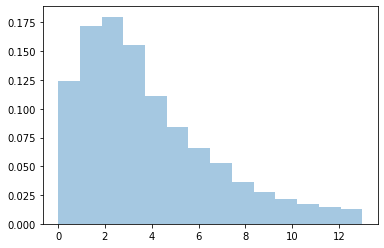

In [20]:
plot_next(diags_unscaled)

In [154]:
from scipy.stats import poisson

def compare_distributions(df, dists):
    plot_next(df)
    
    for name, dist in dists:
        plt.plot(dist.pmf(np.arange(14)), label=name, linewidth=3, alpha = 0.9)
    
    plt.legend()
    plt.show()

vals, val_cnts = get_next_distr(diags_unscaled)
    
mu = np.mean(vals)
poisson_dist = poisson(mu)

Mean: 3.6486379264744775, Variance: 9.323714754118313


In [156]:
from __future__ import print_function

import numpy as np
from scipy.special import gammaln
from scipy.special import psi
from scipy.special import factorial
from scipy.optimize import fmin_l_bfgs_b as optim

import sys


# X is a numpy array representing the data
# initial params is a numpy array representing the initial values of
# size and prob parameters
def fit_nbinom(X, initial_params=None):
    infinitesimal = np.finfo(np.float).eps

    def log_likelihood(params, *args):
        r, p = params
        X = args[0]
        N = X.size

        #MLE estimate based on the formula on Wikipedia:
        # http://en.wikipedia.org/wiki/Negative_binomial_distribution#Maximum_likelihood_estimation
        result = np.sum(gammaln(X + r)) \
            - np.sum(np.log(factorial(X))) \
            - N*(gammaln(r)) \
            + N*r*np.log(p) \
            + np.sum(X*np.log(1-(p if p < 1 else 1-infinitesimal)))

        return -result

    def log_likelihood_deriv(params, *args):
        r, p = params
        X = args[0]
        N = X.size

        pderiv = (N*r)/p - np.sum(X)/(1-(p if p < 1 else 1-infinitesimal))
        rderiv = np.sum(psi(X + r)) \
            - N*psi(r) \
            + N*np.log(p)

        return np.array([-rderiv, -pderiv])

    if initial_params is None:
        #reasonable initial values (from fitdistr function in R)
        m = np.mean(X)
        v = np.var(X)
        size = (m**2)/(v-m) if v > m else 10

        #convert mu/size parameterization to prob/size
        p0 = size / ((size+m) if size+m != 0 else 1)
        r0 = size
        initial_params = np.array([r0, p0])

    bounds = [(infinitesimal, None), (infinitesimal, 1)]
    optimres = optim(log_likelihood,
                     x0=initial_params,
                     #fprime=log_likelihood_deriv,
                     args=(X,),
                     approx_grad=1,
                     bounds=bounds)

    params = optimres[0]
    return params[0], params[1]

from scipy.stats import nbinom

size, prob = fit_nbinom(vals)
print(f"n: {size}, p:{prob}")

nbin_dist = nbinom(size, prob)

n: 2.2087432934520663, p:0.37708716516008195


In [158]:
poisson(1).pmf(1)

0.36787944117144233

In [141]:
from scipy.stats import geom

p = len(vals) / np.sum(vals)
geom_dist = geom(p)

g1_index = vals > 1
vals_g1 = vals[g1_index]
p_g1 = len(vals_g1) / np.sum(vals_g1)
geom_g1_dist = geom(p_g1)

Mean: 3.6486379264744775, Variance: 9.323714754118313


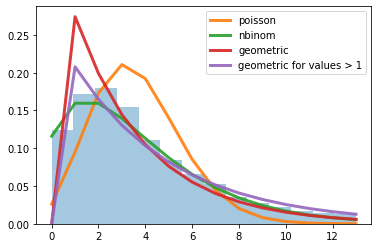

In [157]:
compare_distributions(diags_unscaled, 
                      [('poisson', poisson_dist), ('nbinom', nbin_dist), ('geometric', geom_dist), ('geometric for values > 1', geom_g1_dist)])

In [153]:
from scipy.stats import chisquare

def chi_for_dist(df, dist):
    vals, val_cnts = get_next_distr(df)
    observed_freq = val_cnts.values / np.sum(val_cnts.values)
    dist_freq = dist.pmf(np.arange(len(observed_freq)))
    
    print(f"Observed freq: {observed_freq}\nDistribution freq: {dist_freq}")
    
    score = chisquare(observed_freq, dist_freq)
    print(f"Chisquare: {score}\n")
    return score

chi_for_dist(diags_unscaled, poisson_dist)
chi_for_dist(diags_unscaled, nbin_dist)
chi_for_dist(diags_unscaled, geom_dist)
chi_for_dist(diags_unscaled, geom_g1_dist)

Mean: 3.6486379264744775, Variance: 9.323714754118313
Observed freq: [0.11541259 0.1595808  0.16711849 0.14404258 0.10337874 0.07828617
 0.06149167 0.04866437 0.03345676 0.02591907 0.02029886 0.0162986
 0.01371992 0.01233139]
Distribution freq: [2.60265547e-02 9.49614747e-02 1.73240019e-01 2.10696701e-01
 1.92188994e-01 1.40245610e-01 8.52842422e-02 4.44530458e-02
 2.02741336e-02 8.21921920e-03 2.99889549e-03 9.94716711e-04
 3.02446760e-04 8.48860553e-05]
Chisquare: Power_divergenceResult(statistic=3.1916958453722355, pvalue=0.9971501067859189)

Mean: 3.6486379264744775, Variance: 9.323714754118313
Observed freq: [0.11541259 0.1595808  0.16711849 0.14404258 0.10337874 0.07828617
 0.06149167 0.04866437 0.03345676 0.02591907 0.02029886 0.0162986
 0.01371992 0.01233139]
Distribution freq: [0.11600314 0.1596031  0.15950456 0.13938991 0.11306587 0.08745659
 0.0654528  0.04781171 0.03428247 0.02422309 0.01691274 0.01169283
 0.00801729 0.00545843]
Chisquare: Power_divergenceResult(statistic=0

Power_divergenceResult(statistic=inf, pvalue=0.0)